## Shreyas Kulkarni(sk385)
##  Soham Gupte(sohamgup)

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
def get_iris_df():
 ds = sklearn.datasets.load_iris()
 df = pd.DataFrame(ds['data'],columns = ds['feature_names'])
 code_species_map = dict(zip(range(3), ds['target_names']))
 df['species'] = [code_species_map[c] for c in ds['target']]
 return df
df = get_iris_df()

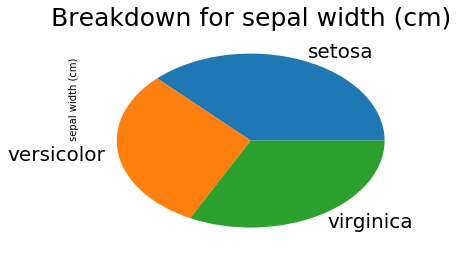

In [58]:
#Piechart
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title('Breakdown for ' + var, fontsize=25)

plt.show()

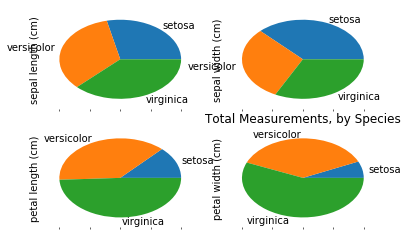

In [59]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True,
layout=(2,2), legend=False)
plt.title('Total Measurements, by Species')
plt.show()

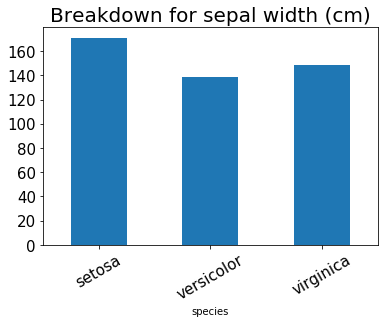

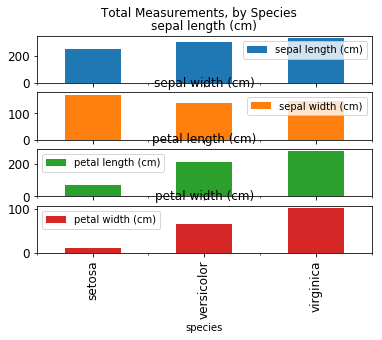

In [60]:
#Bar Charts
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15,
rot=30)
plt.title('Breakdown for ' + var, fontsize=20)
plt.show()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')
plt.show()


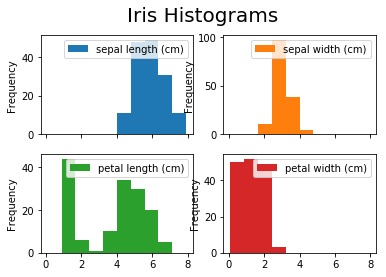

In [61]:
#Histograms
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

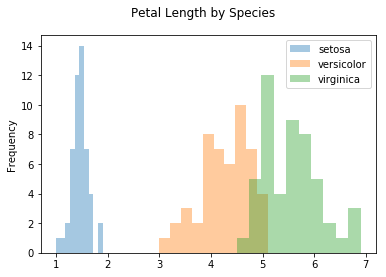

In [62]:
for spec in df['species'].unique():
 forspec = df[df['species']==spec]
 forspec['petal length (cm)'].plot(
  kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.show()

In [63]:
#Means,SD,Medians
col = df['petal length (cm)']
Average = col.mean()
Std = col.std()
Median = col.quantile(0.5)
Percentile25 = col.quantile(0.25)
Percentile75 = col.quantile(0.75)
print(Median)
print(Percentile25)
print(Percentile75)

4.35
1.6
5.1


In [64]:
col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()
print(Perc25)
print(Perc75)
print(Clean_Avg)

1.6
5.1
4.0984375


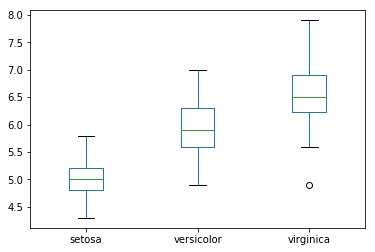

In [65]:
#Boxplots
col = "sepal length (cm)"
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

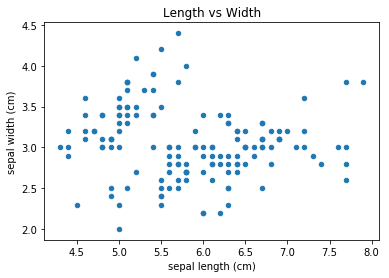

In [66]:
#Scatterplots
df.plot(kind="scatter",
x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()

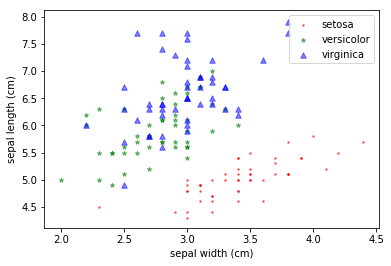

In [67]:
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter",x="sepal width (cm)", y="sepal length (cm)",alpha=0.5, s=10*(i+1), ax=ax,color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

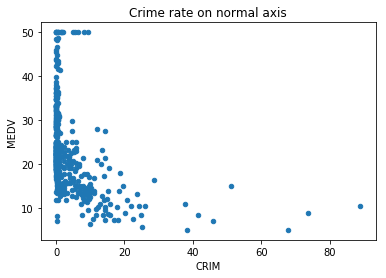

In [68]:
#Scatterplotswithlogaxes
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title("Crime rate on normal axis")
plt.show()

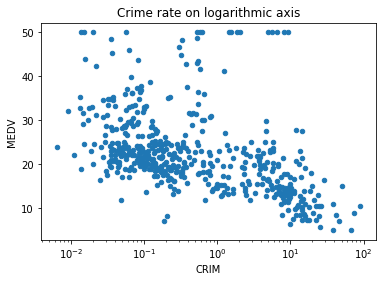

In [69]:
df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title("Crime rate on logarithmic axis")
plt.show()

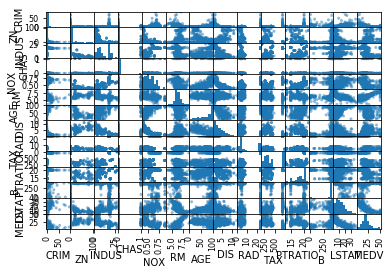

In [70]:
#Scatter Matrices
plt.close()
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.figure(figsize=(500,500))
plt.show()

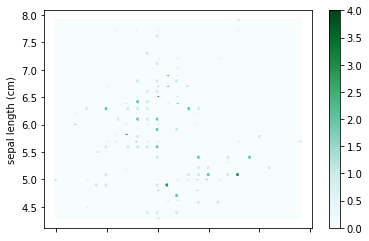

In [76]:
#Heatmap
def get_iris_df():
 ds = sklearn.datasets.load_iris()
 df = pd.DataFrame(ds['data'],columns = ds['feature_names'])
 code_species_map = dict(zip(range(3), ds['target_names']))
 df['species'] = [code_species_map[c] for c in ds['target']]
 return df
df = get_iris_df()
plt.close()
df.plot(kind="hexbin",
x="sepal width (cm)", y="sepal length (cm)")
plt.show()

In [78]:
#Correlations
df["sepal width (cm)"].corr(df["sepal length (cm)"]) # Pearson corr

df["sepal width (cm)"].corr(df["sepal length (cm)"], method="pearson")


-0.10936924995064937

In [79]:
df["sepal width (cm)"].corr(
df["sepal length (cm)"], method="spearman")
df["sepal width (cm)"].corr(
df["sepal length (cm)"], method="spearman")

-0.15945651848582867

/home/soham/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


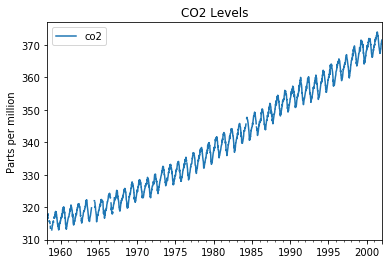

In [80]:
#Timeseries
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

In [ ]:
import urllib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib import request
# Get raw CSV data from the web
URL = ("https://finance.yahoo.com/quote/GOOG/history?p=GOOG")
dat = urllib.request.urlopen(URL).read()
open('text.csv','wb').write(dat)
# Make DataFrame, w timestamp as the index
df = pd.read_csv('text.csv')
df.index = df['Date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()